In [15]:
import pandas as pd

In [85]:
df = pd.read_csv('gun_violence_USA.csv')

In [86]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


### Clean Data

In [87]:
df.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [88]:
df.shape

(239677, 29)

In [89]:
df.dropna(subset=['address'],inplace=True)

In [90]:
df.shape

(223180, 29)

In [91]:
df.dropna(subset=['sources'],inplace=True)

In [92]:
df.shape

(222604, 29)

In [93]:
df.dropna(subset=['source_url'],inplace=True)

In [94]:
df.shape

(222207, 29)

In [95]:
df.dropna(subset=['notes'],inplace=True)

In [96]:
df.shape

(147450, 29)

In [97]:
df.dropna(subset=['n_guns_involved'],inplace=True)

In [98]:
df.shape

(91652, 29)

In [99]:
df.dropna(subset=['location_description'],inplace=True)


In [100]:
df.shape

(24903, 29)

In [127]:
df['gun_stolen'].value_counts()

0::Unknown                       4893
0::Stolen                         479
0::Not-stolen                     186
0:Unknown                           4
0:Unknown|1:Unknown|2:Unknown       2
0:Stolen|1:Stolen                   1
0:Stolen                            1
Name: gun_stolen, dtype: int64

In [ ]:
df = df[~df['gun_stolen'].str.contains('Unknown')]

In [101]:
df['gun_type'].value_counts()

0::Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [102]:
fatal_list = []

#Code that adds a new column where it indicates if the shooting was fatal or not

for index, row in df.iterrows():
    if row['n_killed'] == 0:
        fatal_list.append(0)
    else:
        fatal_list.append(1)

df['fatal'] = fatal_list

In [103]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,fatal
20,480327,2013-02-11,Delaware,Wilmington,500 North King Street,3,2,http://www.gunviolencearchive.org/incident/480327,http://www.philly.com/philly/news/Police_ID_vi...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Male||3::Male||4::Male,"0::Laura Elizabeth ""Beth"" Mulford||1::Christin...",NaN,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,2.0,3.0,1
33,481237,2013-03-10,Missouri,Kansas City,9331 Hillcrest Rd,0,5,http://www.gunviolencearchive.org/incident/481237,http://m.columbiatribune.com/news/five-shot-du...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kctv5.com/story/21566401/gunfire-er...,27.0,9.0,0
34,482771,2013-03-11,District of Columbia,Washington,1200 North Capitol Street,0,13,http://www.gunviolencearchive.org/incident/482771,https://www.washingtonpost.com/local/police-se...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Craig Steven Wilson||1::Andrew Davon Allen|...,NaN,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,http://www.washingtontimes.com/news/2013/may/2...,NaN,NaN,0
36,482856,2013-03-13,New York,Mohawk,17 W Main St,6,2,http://www.gunviolencearchive.org/incident/482856,http://www.syracuse.com/news/index.ssf/2013/03...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/upstate-new-york-s...,101.0,51.0,1
62,485979,2013-04-28,Tennessee,Jackson,438 East Main Street,2,2,http://www.gunviolencearchive.org/incident/485979,https://www.wbbjtv.com/2014/02/19/jury-returns...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||5::Male||6...,0::Brian Jontez Banes||1::Delandis Cortez Clar...,NaN,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.examiner.com/article/two-dead-two-w...,80.0,27.0,1


In [104]:
df = df[~df['gun_type'].str.contains('\|\|')]

In [105]:
df.shape

(22736, 30)

In [136]:
df = df[~df['gun_type'].str.contains('\|')]

In [106]:
df['gun_type'].value_counts()

0::Unknown                                                                                                                                                                                                                                                                                                                         17114
0::Handgun                                                                                                                                                                                                                                                                                                                          2762
0::9mm                                                                                                                                                                                                                                                                                                                               704
0::22 LR     

In [108]:
df = df[~df['gun_type'].str.contains('Unknown')]

In [137]:
df['gun_type'].value_counts()

0::Handgun            2762
0::9mm                 704
0::22 LR               287
0::380 Auto            277
0::40 SW               256
0::Shotgun             252
0::Rifle               226
0::45 Auto             206
0::38 Spl              149
0::357 Mag              70
0::223 Rem [AR-15]      68
0::25 Auto              58
0::12 gauge             56
0::32 Auto              52
0::7.62 [AK-47]         49
0::Other                47
0::44 Mag               13
0::20 gauge              9
0::10mm                  5
0::410 gauge             4
0::30-30 Win             3
0:40 SW                  2
0::30-06 Spr             2
0::16 gauge              2
0:9mm                    1
0:Other                  1
0:45 Auto                1
0::28 gauge              1
Name: gun_type, dtype: int64

In [380]:
df['state'].value_counts()

Florida                 542
Texas                   438
New York                433
Massachusetts           298
Georgia                 255
Tennessee               253
Ohio                    249
Pennsylvania            232
California              180
Washington              170
Michigan                153
Illinois                144
Connecticut             130
Indiana                 128
Virginia                117
Louisiana               113
Kentucky                103
North Carolina           98
Missouri                 95
Oregon                   92
South Carolina           89
Wisconsin                86
New Jersey               80
Oklahoma                 80
Colorado                 68
Minnesota                61
Arizona                  58
New Hampshire            56
Utah                     50
Maryland                 49
Alaska                   48
West Virginia            48
Iowa                     48
Alabama                  46
Rhode Island             45
Nevada              

### Visualize Data

In [116]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

<AxesSubplot:xlabel='n_killed', ylabel='state'>

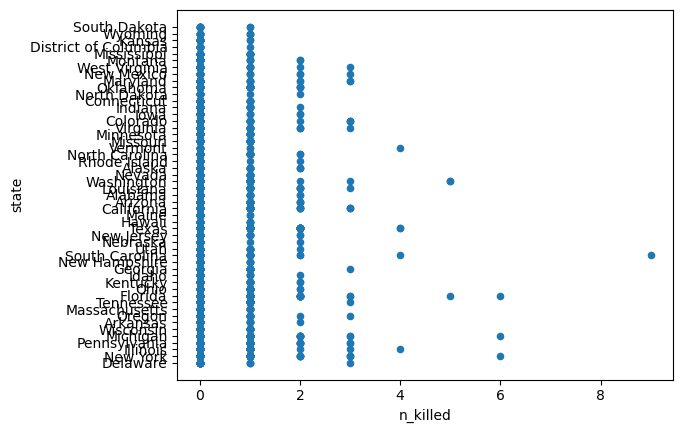

In [120]:
df.plot.scatter(x='n_killed', y='state')

<AxesSubplot:xlabel='n_killed', ylabel='gun_type'>

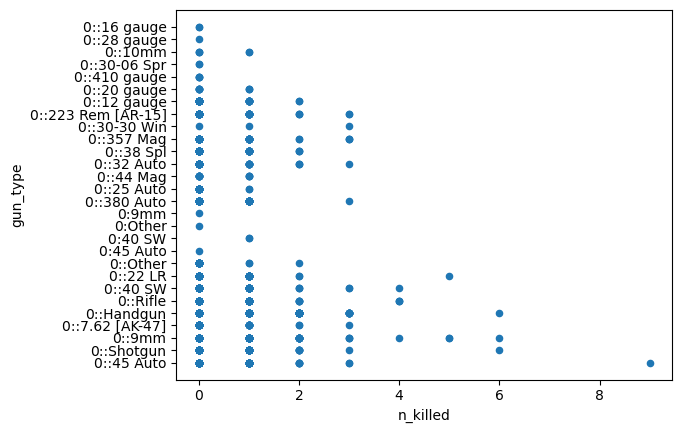

In [383]:
df.plot.scatter(x='n_killed', y='gun_type')

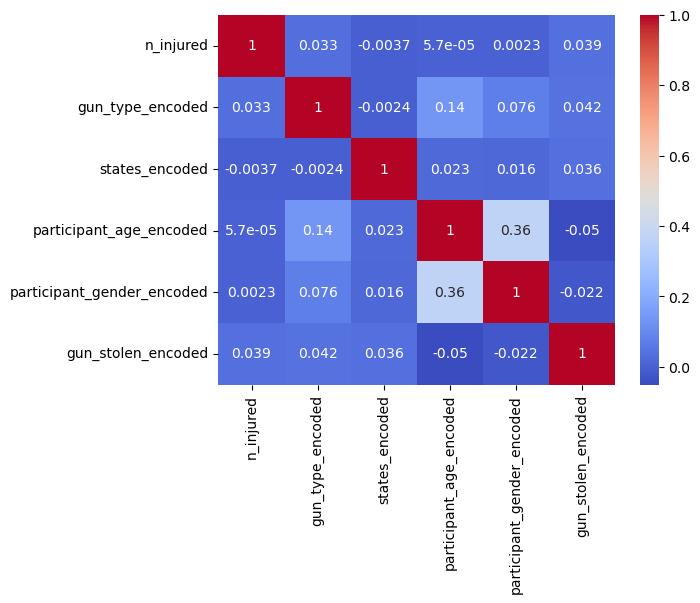

In [323]:
corr = df[['n_injured', 'gun_type_encoded', 'states_encoded', 'participant_age_encoded',
           'participant_gender_encoded', 'gun_stolen_encoded']].corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [ ]:
df['state'].hist(orientation = 'horizontal')

<AxesSubplot:>

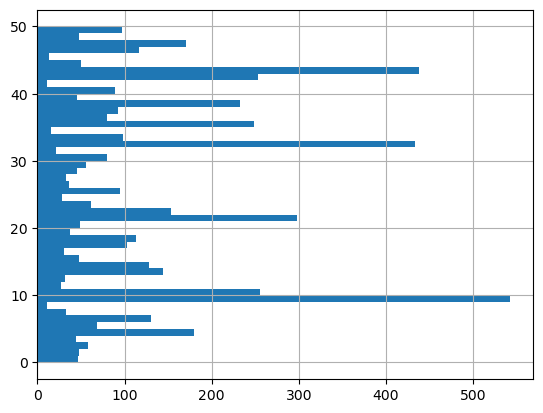

In [377]:
df['states_encoded'].hist(orientation = 'horizontal', bins = 50)

### ML algorithm

In [384]:
# Label Encode
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gun_type_encoded'] = le.fit_transform(df['gun_type'])
df['gun_stolen_encoded'] = le.fit_transform(df['gun_stolen'])
df['states_encoded'] = le.fit_transform(df['state'])
df['participant_age_encoded'] = le.fit_transform(df['participant_age'])
df['participant_gender_encoded'] = le.fit_transform(df['participant_gender'])

In [385]:
X = df[['n_injured', 'gun_type_encoded', 'gun_stolen_encoded', 'states_encoded', 
       'participant_age_encoded', 'participant_gender_encoded']]

y = df['fatal']

In [386]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [387]:
features = df[['n_injured','gun_type_encoded', 'gun_stolen_encoded', 'states_encoded', 
       'participant_age_encoded', 'participant_gender_encoded']]

label_encode(features, features.columns.values)

target = df[['fatal']]
label_encode(target, target.columns.values)

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_42296/3660802656.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df[col] = col_values_transformed
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_42296/3660802656.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df[col] = col_values_transformed


# RandomForest

In [388]:
from sklearn.ensemble import RandomForestClassifier

# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

# fit model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [389]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [390]:
features = X.columns
print(features)
importances = model.feature_importances_
print(importances)

Index(['n_injured', 'gun_type_encoded', 'gun_stolen_encoded', 'states_encoded',
       'participant_age_encoded', 'participant_gender_encoded'],
      dtype='object')
[0.10759681 0.08681006 0.02186299 0.15433924 0.30562159 0.32376932]


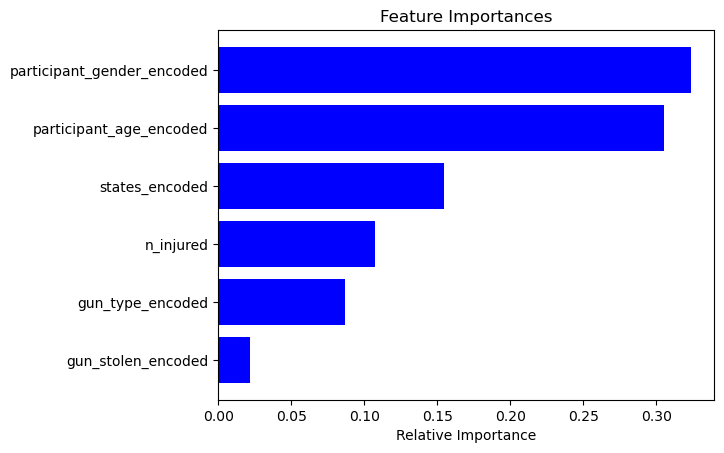

In [391]:
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [392]:
X = df[['n_injured', 'gun_type_encoded', 'gun_stolen_encoded', 'states_encoded', 
       'participant_age_encoded', 'participant_gender_encoded']]

y = df['fatal']

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred))

0.8634321653189577
0.6618824647122692
